## 가짜 상관관계 예제 : MNIST에 노이즈 섞기

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
noise_train_images = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis = 1) # 훈련 이미지 개수만큼의 노이즈
zero_train_images = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis = 1) # 훈련 이미지 개수만큼의 흰색 이미지

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation = 'relu'),
      layers.Dense(10, activation = 'softmax')
  ])
  model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

model = get_model()
history_noise = model.fit(noise_train_images, train_labels, epochs = 10, batch_size = 128, validation_split = 0.2)
history_zero = model.fit(zero_train_images, train_labels, epochs = 10, batch_size = 128, validation_split = 0.2)


Epoch 1/10
375/375 [==============================] - 10s 24ms/step - loss: 0.6098 - accuracy: 0.8127 - val_loss: 0.3146 - val_accuracy: 0.9112
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 0.2506 - accuracy: 0.9225 - val_loss: 0.2554 - val_accuracy: 0.9152
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.1661 - accuracy: 0.9492 - val_loss: 0.1645 - val_accuracy: 0.9503
Epoch 4/10
375/375 [==============================] - 9s 24ms/step - loss: 0.1200 - accuracy: 0.9631 - val_loss: 0.1394 - val_accuracy: 0.9592
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0874 - accuracy: 0.9733 - val_loss: 0.1362 - val_accuracy: 0.9608
Epoch 6/10
375/375 [==============================] - 16s 42ms/step - loss: 0.0643 - accuracy: 0.9799 - val_loss: 0.1385 - val_accuracy: 0.9614
Epoch 7/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.1705 - val_accuracy: 0.

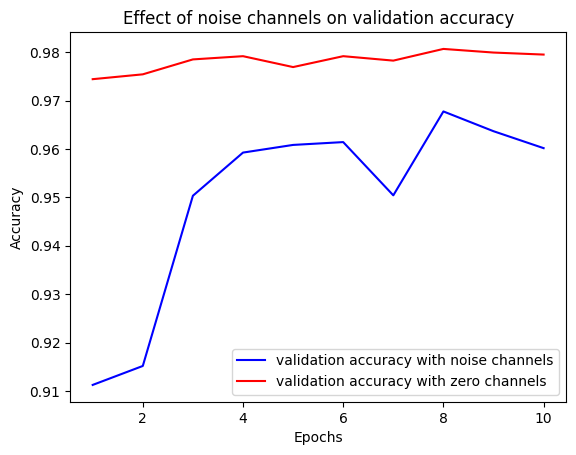

In [7]:
# 검증 정확도 비교 그래프
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zero = history_zero.history['val_accuracy']

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label = "validation accuracy with noise channels")
plt.plot(epochs, val_acc_zero, 'r-', label = "validation accuracy with zero channels")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
# 딥러닝의 놀라운 점 : 어떤 것에도 맞출 수 있도록 훈련 가능하다
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

# 이미지 - label을 뒤섞어 버림(즉 6을 나타내는 이미지에 3이라는 label이 붙음)
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, random_train_labels, epochs = 100, batch_size = 128, validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3158 - accuracy: 0.1007 - val_loss: 2.3045 - val_accuracy: 0.1053
Epoch 2/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2991 - accuracy: 0.1167 - val_loss: 2.3068 - val_accuracy: 0.1043
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2910 - accuracy: 0.1259 - val_loss: 2.3169 - val_accuracy: 0.1044
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2797 - accuracy: 0.1394 - val_loss: 2.3217 - val_accuracy: 0.1065
Epoch 5/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2636 - accuracy: 0.1501 - val_loss: 2.3343 - val_accuracy: 0.1050
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2432 - accuracy: 0.1660 - val_loss: 2.3467 - val_accuracy: 0.1027
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2223 - accuracy: 0.1776 - val_loss: 2.3597 - val_accuracy: